In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

In [73]:
data = pd.read_csv('./Student_Marks.csv')
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


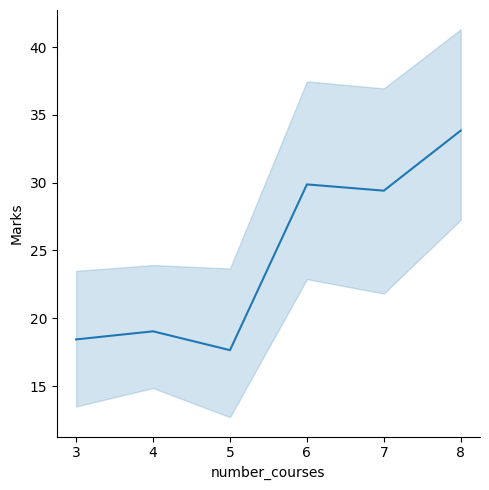

In [74]:
sns.relplot(x="number_courses", y="Marks", data=data,kind="line" )

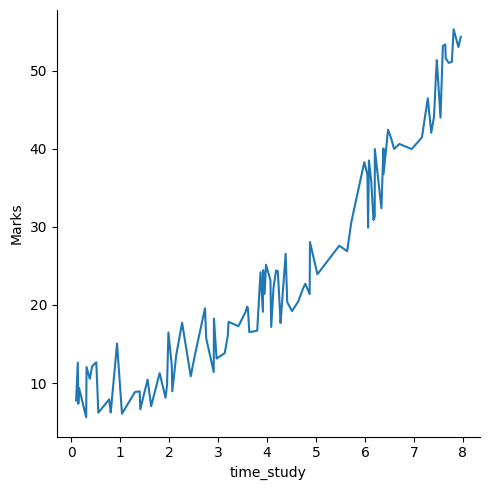

In [75]:
sns.relplot(x="time_study", y="Marks", data=data,kind="line" )

In [76]:
y = data['Marks']
X = data.drop(['Marks'], axis = 1)
X.shape, y.shape

((100, 2), (100,))

In [77]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
y = std.fit_transform(y.values.reshape((-1,1)))
X = std.fit_transform(X)

In [78]:
X

array([[-1.27897041,  0.18248894],
       [-0.72046805, -1.68619512],
       [-0.72046805, -0.39988653],
       [ 0.39653668,  1.6229682 ],
       [ 1.5135414 ,  1.58146071],
       [ 0.39653668, -0.36684996],
       [-1.27897041,  0.84110266],
       [-0.16196569, -0.28129371],
       [-0.72046805,  0.14098145],
       [-1.27897041,  0.8876927 ],
       [-1.27897041,  1.38747674],
       [ 0.95503904, -1.54769564],
       [ 0.95503904,  0.05966066],
       [-1.27897041,  0.08337923],
       [-1.27897041, -0.49518433],
       [-0.72046805,  0.07744958],
       [-0.16196569,  0.6954029 ],
       [ 1.5135414 ,  0.84830294],
       [ 0.39653668,  1.53910613],
       [ 1.5135414 , -0.04241388],
       [-0.72046805,  0.27778675],
       [ 0.39653668,  0.86778604],
       [-0.16196569, -0.85816308],
       [ 0.95503904,  0.33793025],
       [-0.72046805, -0.18726654],
       [-1.27897041, -1.13092658],
       [ 0.95503904, -1.51169425],
       [ 1.5135414 ,  0.12742799],
       [-0.16196569,

In [79]:
y

array([[-3.65900672e-01],
       [-1.17042489e+00],
       [-7.44100013e-01],
       [ 2.00642152e+00],
       [ 2.16644242e+00],
       [-4.62712968e-01],
       [ 3.83833396e-01],
       [-5.01858810e-01],
       [-2.85504373e-01],
       [ 4.52093080e-01],
       [ 1.23599207e+00],
       [-8.61888307e-01],
       [-6.99363612e-03],
       [-4.73236044e-01],
       [-9.13451378e-01],
       [-3.47380059e-01],
       [ 4.30064775e-01],
       [ 9.87226558e-01],
       [ 1.86386892e+00],
       [ 5.01817419e-02],
       [-1.64489003e-01],
       [ 8.08264117e-01],
       [-8.56486462e-01],
       [ 2.54329411e-01],
       [-5.54263727e-01],
       [-1.24836580e+00],
       [-8.25759081e-01],
       [ 1.48326961e-01],
       [-1.05824890e+00],
       [-1.09304520e+00],
       [-1.72360965e-02],
       [-1.14474858e+00],
       [-6.58021254e-01],
       [ 1.09070347e+00],
       [-5.08383117e-01],
       [ 1.37223082e+00],
       [-7.92646469e-01],
       [ 1.54586157e+00],
       [ 1.1

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((80, 2), (80, 1))

In [81]:
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [82]:
model = Sequential()
model.add(Dense(4, input_shape = (X_train.shape[1],), activation = 'relu'))
model.add(Dense(1))

/Users/bhagya/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model.compile(loss = 'mean_squared_error', optimizer = 'sgd', metrics = ['mae', 'mse'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.fit(X_train, y_train, epochs=200, validation_split=0.2, verbose=1)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 2.9513 - mae: 1.4124 - mse: 2.9513 - val_loss: 2.8283 - val_mae: 1.2825 - val_mse: 2.8283
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.5518 - mae: 1.3306 - mse: 2.5518 - val_loss: 2.3683 - val_mae: 1.1793 - val_mse: 2.3683
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.4199 - mae: 1.3036 - mse: 2.4199 - val_loss: 2.0179 - val_mae: 1.0942 - val_mse: 2.0179
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9687 - mae: 1.1747 - mse: 1.9687 - val_loss: 1.7445 - val_mae: 1.0251 - val_mse: 1.7445
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7474 - mae: 1.0959 - mse: 1.7474 - val_loss: 1.5273 - val_mae: 0.9662 - val_mse: 1.5273
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6565 - mae: 1.0616 - mse: 1.6565 - val_loss: 1.3554 - val_mae: 0.9161 - val_mse: 1.3554
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5515 - mae: 1.0388 - mse: 1.5515 - val_loss: 1.2142 

In [85]:
pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [86]:
r2 = r2_score(y_test, pred)
r2

0.9859264106833646